<font colors=black, size='5'> Analyzing Denver's Crime Data</font>

### Neil Oza
</font>



<font size='3'><b>Introduction</b></font>

Hello, my name is Neil Oza. I lived in the city of Denver up until two months ago, and I am currently honing my data science skills. For practice and fun, I decided to see what information I could gleam from Denver's publicly available crime data. I will create some visualizations to help analyze the locations and seasonalities of different types of crimes, and I will perform some statistical to tests to hopefully find interesting trends in the data. My goal is to organize this large data in a way that would help law enforcement in Denver allocate their resources more efficiently. let's get started! 



<b><font size=3>Preparing the Data</font></b>

To begin, let's import the tools we'll need to analyze Denver's crime data. The numpy, pandas, seaborn, and statsmodels.api packages will all prove useful during our analysis, as will the stats module from scipy, so let's start by importing those.
<br>
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np

<br>
Next, let's read in Denver's crime data into our notebook. the dataset proper can be found at this link: https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime. personally, I've downloaded the dataset as a csv, so I'll be uploading it from local memory. We will load it into a pandas dataframe, and then take a look at the first fifty entries to get an idea what we have to work with.
<br>
<br>

In [3]:
denver_data=pd.read_csv('/users/neiloza/Downloads/crime.csv', parse_dates=True)
denver_data.head(50)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
8,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/30/2018 9:10:00 AM,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,3142965.0,1693682.0,-104.991650,39.736863,6,611,civic-center,0,1
9,20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,1/31/2018 7:07:00 AM,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


<br>
As we can see, there are a total of 19 columns in this dataset. I reached out to the city of Denver, and received clarification on several of the columns. I will briefly describe each column below. I will go slightly out of order to provide a more cohesive explanation
<br>
<br>
<b>OFFENSE_ID</b> is a unique identifier for each offense. It is generated by concatanating (combining) the INCIDENT_ID, OFFENSE_CODE,and OFFENSE_CODE_EXTENSION. It provides a unique identifier for each offense, as the INCIDENT_ID will have duplicated when multiple offenses are committed at once, and OFFENSE_CODE and OFFENSE_CODE_EXTENSION will present dulicates whenever a certain type of offense is committed

<b>INCIDENT_ID</b> is a unique identifier for an occurence of offenses. most OFFENSE_ID's have unique INCIDENT_ID's, but when a person commits multiple offenses at once, e.g. liquor possession and heroine possession, multiple OFFENSE_ID's will be generated from the INCIDENT_ID

<b>OFFENSE_CODE</b> is a unique identifier for a particular type of offense. things such as criminal mischief, trespassing, larceny, etc. all have different OFFENSE__CODE values to identify them

<b>OFFENSE_CODE_EXTENSION</b> are used to describe a subset of another type crime. for example criminal_mischief- motor vehicle and criminal_mischief-other have the same OFFENSE_CODE but different extensions to differentiate them

<b>OFFENSE_TYPE_ID</b> provides the actual name for the offense in lamens terms. each combination of OFFENSE_CODE and OFFENSE_EXTENSION reference a unique crime. contents of this column include things such as theft-shoplift, criminal-trespassing, and threats-to-injure

<b>OFFENSE_TYPE_CATEGORY</b> provides a more general categorization for crimes. for example, theft-shoplift and theft-from-bldg are both forms of larceny

<b>FIRST_OCCURENCE_DATE</b> is the first possible date/time of the offense. if the time of the offense is known, the LAST_OCCURENCE_DATE will have value NaN. if the time is not known, FIRST_OCCURENCE_DATE will note the first possible time for the offense, and LAST_OCCURENCE_DATE will be last possible time of the offense. This commonly occurs with burglaries, where the exact time of the offense may not be known, but a range of time is known

<b>LAST_OCCURENCE_DATE</b> will be NaN if the exact time of the offense is known and will be an actual time if only a range of possible times is known. in the latter case, it will be the last possible time the offense could have occured.

<b>REPORTED_DATE</b> is the time at which the offense was reported to the police

<b>INCIDENT_ADDRESS</b> provides the location of the offense. not all entries have a value for this column for privacy reasons

<b>GEO_LON</b> and <b>GEO_LAT</b> are the latitudes and longitudes of the location of the offense

<b>GEO_X</b> and <b>GEO_Y</b> are the state plane (city of Denver standard projection) for the offense location. functionally simlar to GEO_LON and GEO_LAT

<b>DISTRICT_ID</b> is the district in charge of handling the offense

<b>PRECINCT_ID</b> is the precinct in charge of handling the offense

<b>NEIGHBORHOOD_ID</b> is the neighborhood the offense occurred in

<b>IS_CRIME</b> states whether the offense was a crime

<b>IS_TRAFFIC</b> states whether the offense was a traffic incident




That was an overview of the columns in our dataset. Next let's make sure the data is clean. To do that, we will check for null values and check for inconsistencies in the data.Let's start by checking for null values

In [19]:
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455872 entries, 0 to 455871
Data columns (total 19 columns):
INCIDENT_ID               455872 non-null int64
OFFENSE_ID                455872 non-null int64
OFFENSE_CODE              455872 non-null int64
OFFENSE_CODE_EXTENSION    455872 non-null int64
OFFENSE_TYPE_ID           455872 non-null object
OFFENSE_CATEGORY_ID       455872 non-null object
FIRST_OCCURRENCE_DATE     455872 non-null object
LAST_OCCURRENCE_DATE      144476 non-null object
REPORTED_DATE             455872 non-null object
INCIDENT_ADDRESS          411003 non-null object
GEO_X                     452166 non-null float64
GEO_Y                     452166 non-null float64
GEO_LON                   452166 non-null float64
GEO_LAT                   452166 non-null float64
DISTRICT_ID               455872 non-null int64
PRECINCT_ID               455872 non-null int64
NEIGHBORHOOD_ID           455872 non-null object
IS_CRIME                  455872 non-null int64
IS_TRAFFIC

Based on the above output, many of the columns have identical numbers for non-null data. this suggests that our data is generally clean. We seem to have 455872 entries in our dataset, with the LAST_OCCURENCE_DATE column and some of the location columns having null values. This makes sense, as a lot of crimes do not have llast occurence dates, and some addresses are withheld due to privacy considerations.


Next let's make sure the data is consistent. Namely, I want to make sure every OFFENSE_CODE and OFFENSE_CODE_EXTENSION combination have a unique OFFENSE_TYPE_ID; if code 4101 sometimes meant liquor-sell and other times meant kidnap-dv, it would suggest there is an error in the data. we will use groupb to make sure each code and extension references exactly one type of crime.

In [32]:
denver_cleaning=display(denver_data.groupby([denver_data.OFFENSE_CODE,denver_data.OFFENSE_CODE_EXTENSION,denver_data.OFFENSE_TYPE_ID]).size())
pd.set_option('display.max_rows',500)
print(denver_cleaning)


OFFENSE_CODE  OFFENSE_CODE_EXTENSION  OFFENSE_TYPE_ID               
902           0                       homicide-family                      21
910           0                       homicide-negligent                    2
912           0                       homicide-other                      216
1006          0                       kidnap-adult-victim                 209
              1                       kidnap-dv                           161
1099          0                       false-imprisonment                  364
1102          0                       sex-aslt-rape                      2145
              1                       sex-aslt-rape-pot                   134
1109          0                       sex-aslt-non-rape                   503
              1                       sex-aslt-non-rape-pot               116
1199          0                       sex-aslt-w-object                    25
              1                       sex-aslt-w-object-pot              

None


As we can see, there are no Offense codes+extensions marked as two different types of offenses. That means there are no mistakes and the data was well maintained. Let's now convert the columns with dates into datetime objects, which will prove useful during aanalysis.

In [49]:
pd.set_option('display.max_rows',50)
denver_data['REPORTED_DATE']=pd.to_datetime(denver_data.REPORTED_DATE)
denver_data['FIRST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.FIRST_OCCURRENCE_DATE)
denver_data['LAST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.LAST_OCCURRENCE_DATE)


For this analysis, we will only analyze crime data, and we will only analyze data through December 31st, 2018. The former is to limit scope, and the latter is to account for inaccuracies in recent crime reportings


In [117]:
denver_crime=denver_data[denver_data['IS_CRIME']==1]
denver_crime=denver_crime[denver_crime['REPORTED_DATE']<'2019']


denver_crime.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333049 entries, 0 to 455871
Data columns (total 19 columns):
INCIDENT_ID               333049 non-null int64
OFFENSE_ID                333049 non-null int64
OFFENSE_CODE              333049 non-null int64
OFFENSE_CODE_EXTENSION    333049 non-null int64
OFFENSE_TYPE_ID           333049 non-null object
OFFENSE_CATEGORY_ID       333049 non-null object
FIRST_OCCURRENCE_DATE     333049 non-null datetime64[ns]
LAST_OCCURRENCE_DATE      142542 non-null datetime64[ns]
REPORTED_DATE             333049 non-null datetime64[ns]
INCIDENT_ADDRESS          302608 non-null object
GEO_X                     329396 non-null float64
GEO_Y                     329396 non-null float64
GEO_LON                   329396 non-null float64
GEO_LAT                   329396 non-null float64
DISTRICT_ID               333049 non-null int64
PRECINCT_ID               333049 non-null int64
NEIGHBORHOOD_ID           333049 non-null object
IS_CRIME                  333049 n

Finally, let's make sure that there are no errors in the first occurence, last occurence, and reported dates. To do this, we will make sure all of the last occurence dates are after the first occurence dates, and all of the reported dates are after the first occurence dates. Any errors found will be printed so they can be corrected by the appropriate parties

In [266]:
denver_crime_occ_dates=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
denver_crime_occ_dates['OCCURENCE_WINDOW']=denver_crime_occ_dates.LAST_OCCURRENCE_DATE-denver_crime_occ_dates.FIRST_OCCURRENCE_DATE
denver_crime_occ_dates['OCCURENCE_WINDOW']=denver_crime_occ_dates.OCCURENCE_WINDOW.fillna(0)
denver_crime_occ_dates[denver_crime_occ_dates['OCCURENCE_WINDOW']<'0']

/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OFFENSE_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,OCCURENCE_WINDOW
43496,2014388104570700,2014-07-26 11:19:00,2014-07-26 10:50:00,2014-07-26 11:19:00,-1 days +23:31:00
44094,2014373704299901,2014-07-19 05:00:00,2014-07-19 04:00:00,2014-07-19 05:27:00,-1 days +23:00:00
50290,2014353737299901,2014-07-09 03:45:00,2014-07-09 02:46:00,2014-07-09 11:09:00,-1 days +23:01:00
53619,2014399282240400,2014-08-01 08:22:00,2014-08-01 06:45:00,2014-08-01 08:22:00,-1 days +22:23:00
62418,2014596887131302,2014-11-08 22:45:00,2014-11-08 22:30:00,2014-11-08 22:49:00,-1 days +23:45:00
67451,20149515342240400,2014-07-28 18:27:00,2014-07-28 07:00:00,2014-07-29 18:27:00,-1 days +12:33:00
100205,2015539465240400,2015-09-17 12:46:00,2015-09-17 08:30:00,2015-09-17 13:56:00,-1 days +19:44:00
111140,201594326239900,2015-02-16 17:55:00,2015-02-16 16:20:00,2015-02-17 17:50:00,-1 days +22:25:00
121863,2015752334570700,2015-12-29 23:30:00,2015-12-29 03:30:00,2015-12-30 00:36:00,-1 days +04:00:00
124008,2016151736355000,2016-03-10 04:15:00,2016-03-10 03:50:00,2016-03-10 04:15:00,-1 days +23:35:00


It seems for a handlful of entries, the first occurence and last occurence dates are misordered. The Offense ID is provided so the appropriate parties can make the relevant corrections. for our purposes, if we ever need to use the difference between the first occurrence and last occurence date, we will use the absolute value, just to be safe

In [ ]:
denver_crime_occ_dates=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
denver_crime_occ_dates['OCC_REPORT_GAP']=''
denver_crime_occ_dates['LOD_NAT']=denver_crime_occ_dates.LAST_OCCURRENCE_DATE.isna()
denver_crime_occ_dates
n=len(denver_crime_occ_dates.index)
for index in range(0,n):
    if denver_crime_occ_dates.iloc[index,-1]==True:
        denver_crime_occ_dates.iloc[index,4]=denver_crime_occ_dates.iloc[index, 3]-denver_crime_occ_dates.iloc[index,1]
    else:
        denver_crime_occ_dates.iloc[index,4]=denver_crime_occ_dates.iloc[index, 3]-denver_crime_occ_dates.iloc[index,2]
        
denver_crime_occ_dates

<br>
<br>
<br>
<font size=3><b>Preliminary Analysis</b></font>

It is time to begin our analysis. Let's start by getting a broad overview of our data. Namely, let's look at general crime trends over the years and the distributions of crimes by type.

<br>

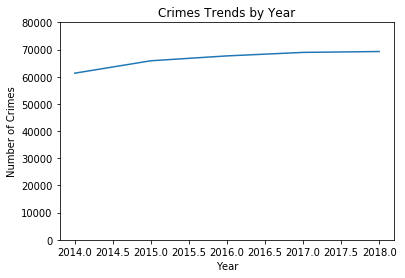

In [101]:
denver_crime['REPORTED_DATE'].groupby(denver_crime.REPORTED_DATE.dt.year).agg('count').plot('line')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes Trends by Year')
plt.ylim(bottom=0,top=80000)
plt.show()

In [169]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts()





all-other-crimes                82302
public-disorder                 47438
larceny                         45225
theft-from-motor-vehicle        33219
drug-alcohol                    30051
auto-theft                      23601
burglary                        22525
other-crimes-against-persons    21938
aggravated-assault              10438
white-collar-crime               5998
robbery                          5833
sexual-assault                   3653
arson                             570
murder                            258
Name: OFFENSE_CATEGORY_ID, dtype: int64

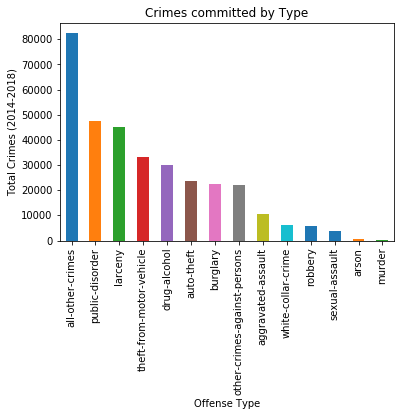

In [57]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

Text(0, 0.5, 'Total Crimes (2014-2018)')

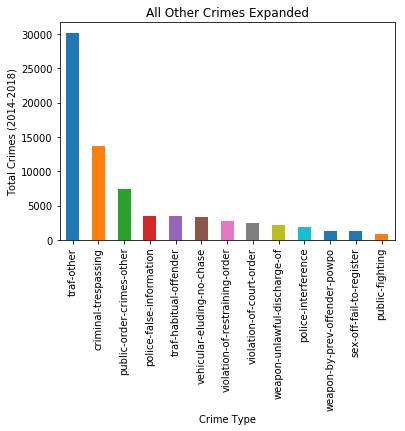

In [168]:
#only listing the top thirteen subdivisions of 'all-other-crimes', for sake of space
denver_misc_crimes=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes'].OFFENSE_TYPE_ID.value_counts().head(13).plot(kind='bar')
plt.title('All Other Crimes Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')

Text(0, 0.5, 'Total Crimes (2014-2018)')

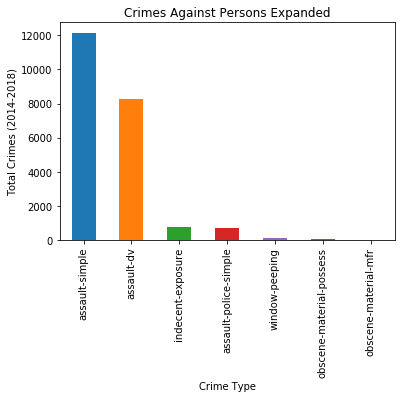

In [167]:
denver_misc_crimes=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].OFFENSE_TYPE_ID.value_counts().plot(kind='bar')
plt.title('Crimes Against Persons Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')

So a few things of note. First off, Crime seems to be on the rise in Denver. The rate seems to be slowing, but their is definitely a steady increase over the past five years. When organized by type, we see that most crimes fall into some type of burglary (larceny, burglary, etc.), public disorder, drugs & alcohol related, or fall into the category of 'all-other-crimes'. The all other crimes category has a lot of subcategories, but it is primarily comprised of traffic incidents and criminal trespassing. Violent crimes are not terribly common in Denver, totalling to only about 50000 of the over 300000 crimes committed in denver over the past five years. Of those violent crimes, most fall under the category of assualt, and well under 10000 arsons, sexual assualts, and murders.

That gives us the general overview of the common crimes in Denver. As mentiond earlier, Denver's biggest crime problem seems to be theft of various sorts. we will take a deeper dive into this later in the analysis. For now, let's look at crime distributions by times. Specifically, let's see if certain crimes are becoming more common over the years, are more common in certain months, or are more common on certain days of the week.

<font size=3><b> Crimes Viewed through Various Timeframes</b></font>

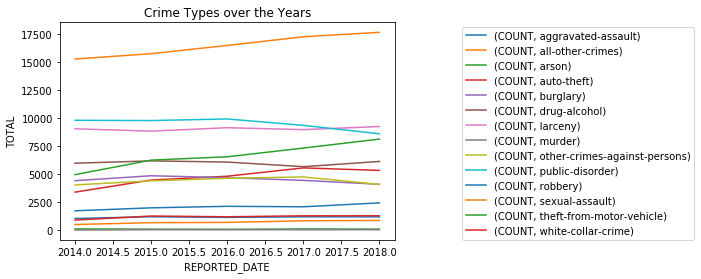

In [171]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.year, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types over the Years')
plt.show()


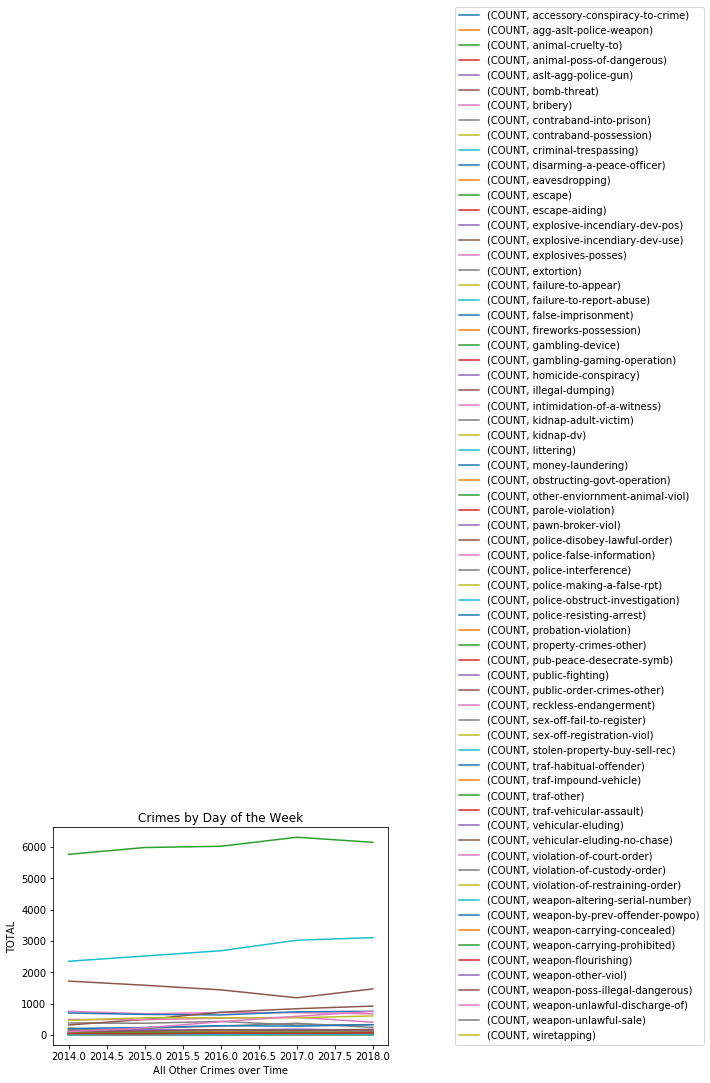

In [237]:
temp=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes']
temp=temp[['REPORTED_DATE','OFFENSE_TYPE_ID']].groupby([temp.REPORTED_DATE.dt.year,temp.OFFENSE_TYPE_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1).plot(kind='line')
plt.legend(loc=(1.2,0))
plt.xlabel('All Other Crimes over Time')
plt.ylabel('TOTAL')
plt.title('Crimes by Day of the Week')
plt.show()

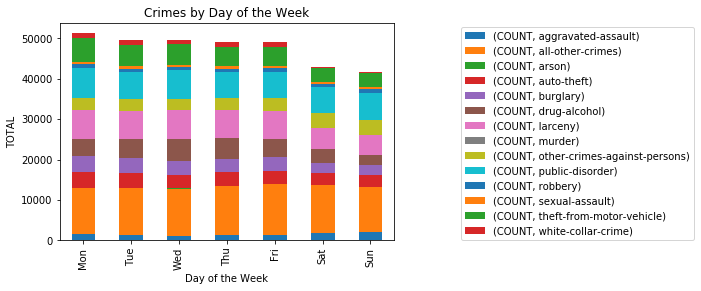

In [211]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.weekday, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.xlabel('Day of the Week(bar graph)')
plt.ylabel('TOTAL')
plt.title('Crimes by Day of the Week')
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()





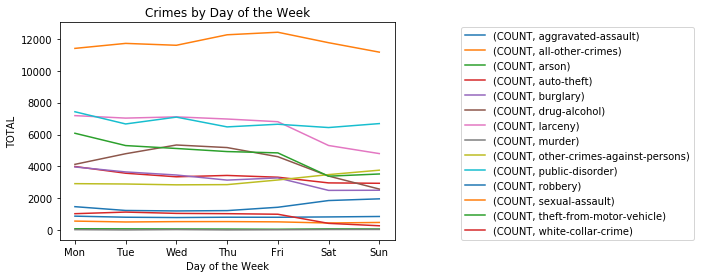

In [210]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.weekday, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Crimes by Day of the Week (line graph)')
plt.xlabel('Day of the Week')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()

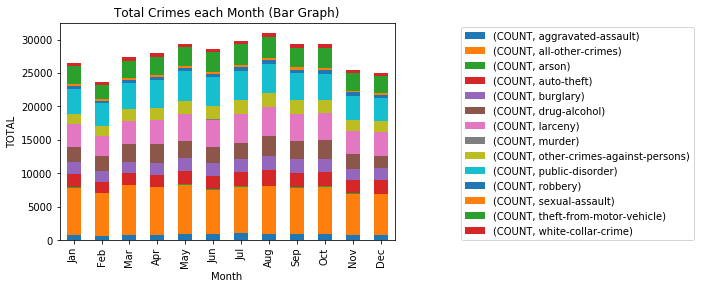

In [216]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.month, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month (Bar Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))



plt.show()

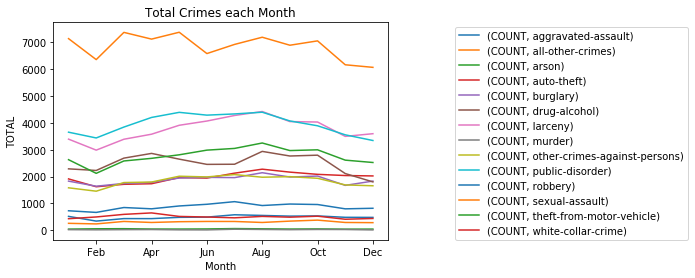

In [214]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.month, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Feb','Apr','Jun','Aug','Oct','Dec'))

plt.show()

The above graphs organize crimes by their category id and by some form of time organization. We first notice that crimes such as trespassing,theft from auto vehicles, and auto theft have risen sharply over the past five years. these three crimes seem to constitute most of the increase in crime over the past five years. no crimes have significantly decreased in quantity over that time. There seems to be a general increase in crime during the summer months, particularly with various types of theft and public disorder. We also notice that there seem to be substantially fewer crimes reported on weekends; witht the exception of robbery and other crimes against persons.

<b><font size=3> Crimes by District</b></font>

Now lets take a look at crimes by district

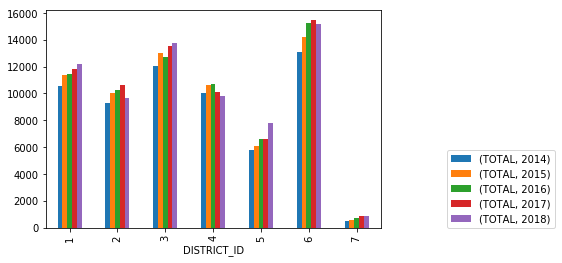

In [122]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID']].groupby([denver_crime.REPORTED_DATE.dt.year, denver_crime.DISTRICT_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['TOTAL']
temp=temp.unstack(level=0)
temp.plot(kind='bar',stacked=False)
plt.legend(loc=(1.2,0))
plt.show()

This first graph shows crime by district over the past five years. Districts 6, 3, and 1 are the largest, while district 7 is the smallest by a large margin. Crime seems to be trending upward over time in every district wih the exception of district 4 and possibly district 2, though more data is needed in the latter's case

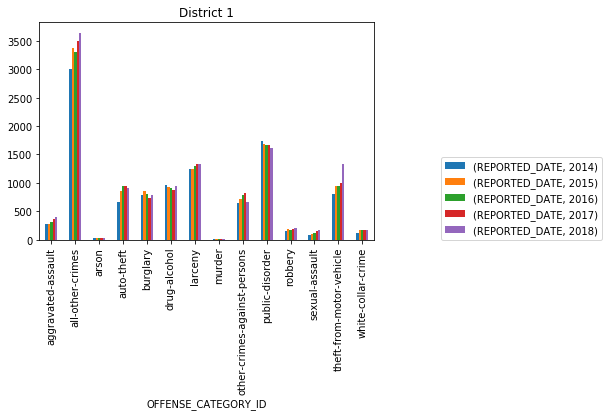

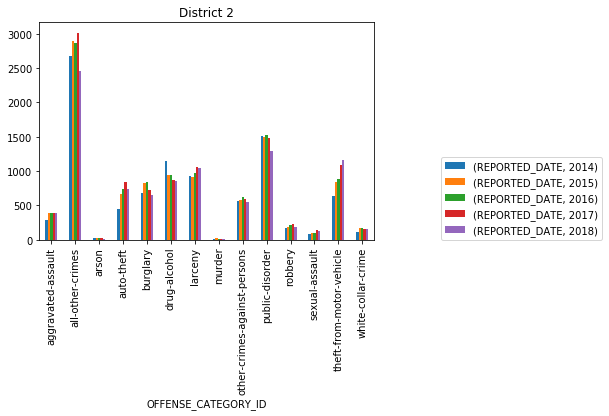

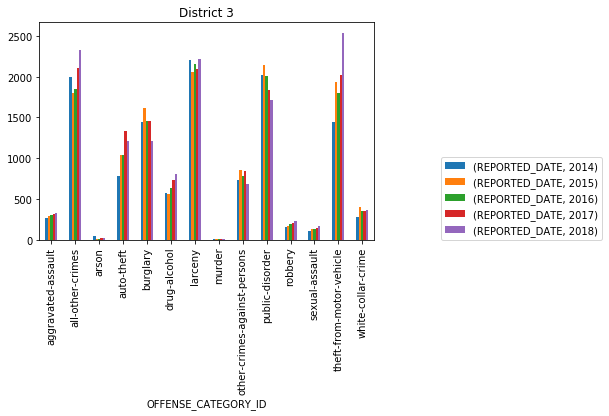

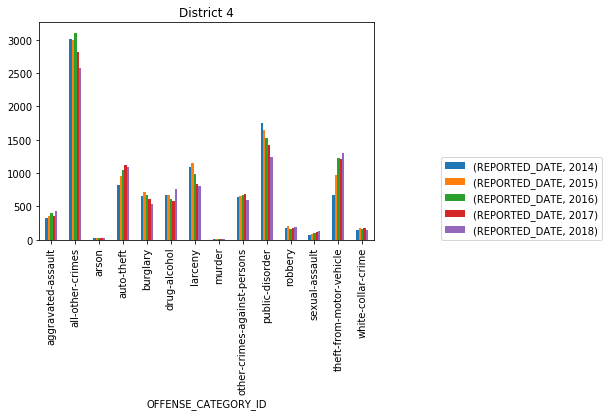

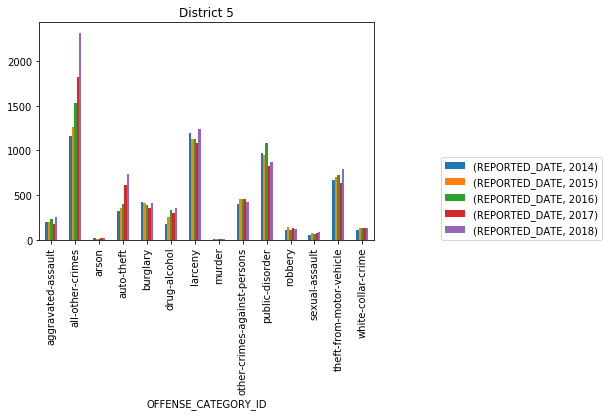

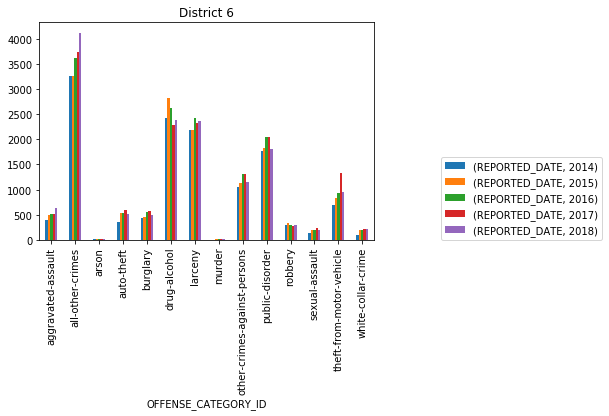

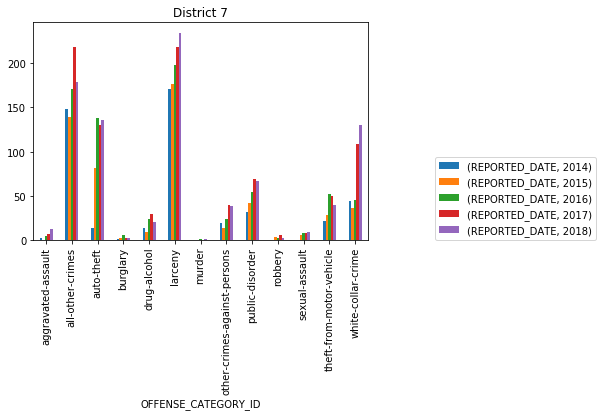

In [249]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for district in range(1,8):
    temp2=temp[temp['DISTRICT_ID']==district].drop('DISTRICT_ID',axis=1)
    temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.OFFENSE_CATEGORY_ID]).agg('count')
    temp2=temp2.unstack(level=0).plot(kind='bar').legend(loc=(1.2,0))
    plt.title('District '+str(district))
    plt.show()
    
    

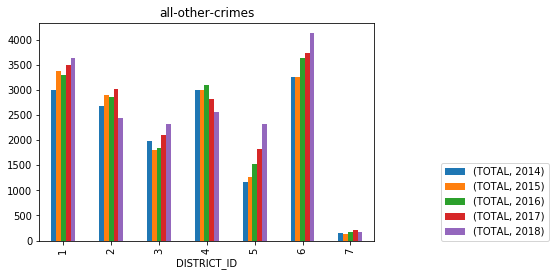

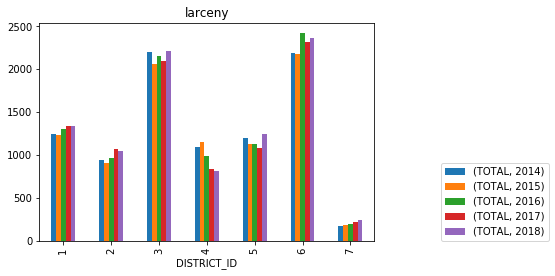

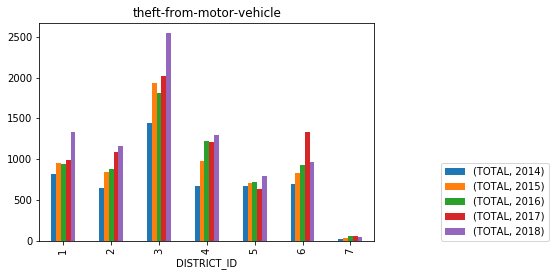

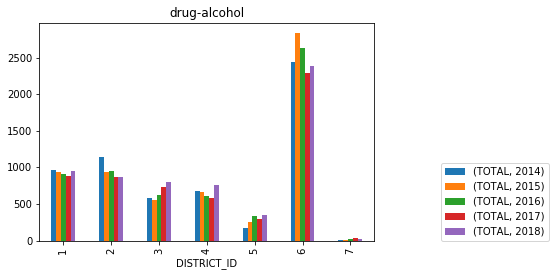

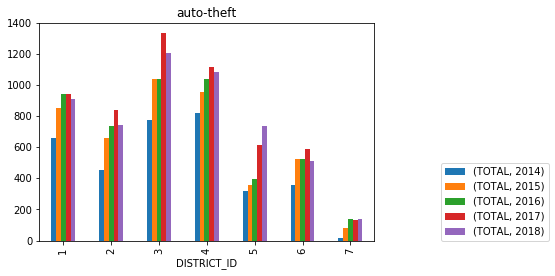

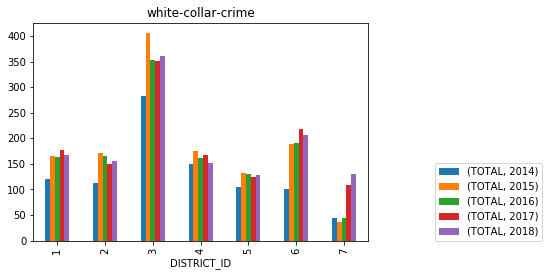

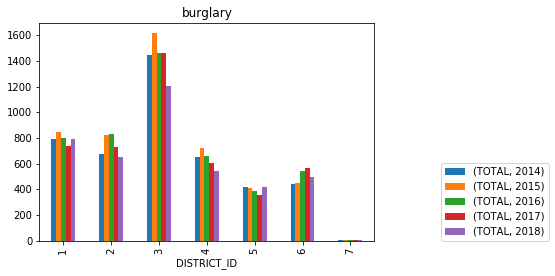

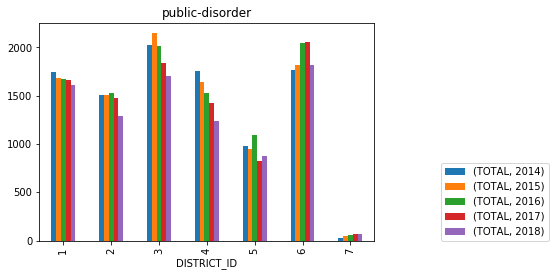

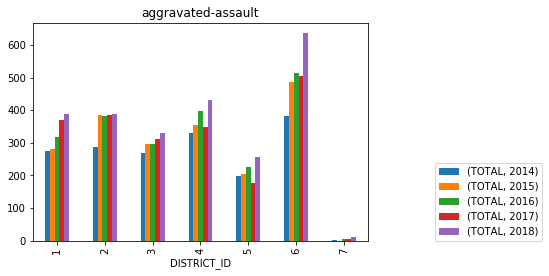

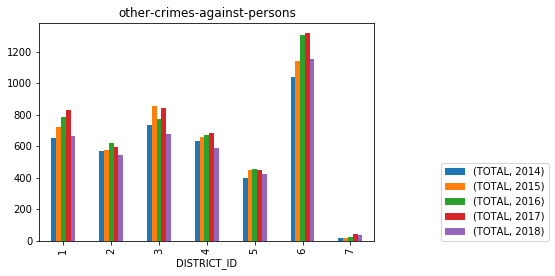

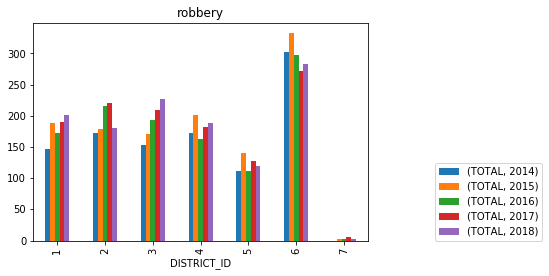

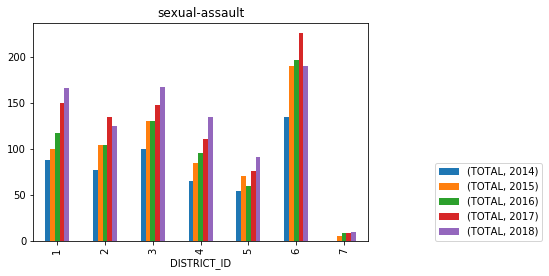

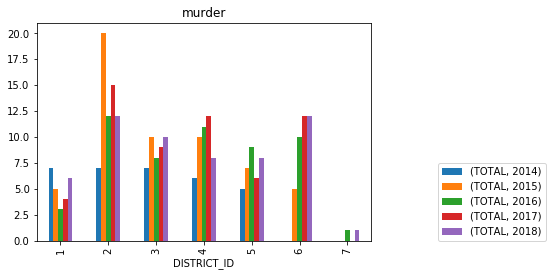

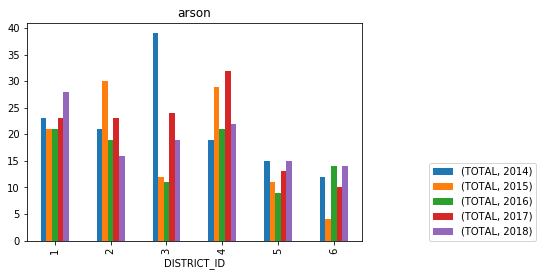

In [251]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for offense in denver_crime.OFFENSE_CATEGORY_ID.unique():
    temp2=temp[temp['OFFENSE_CATEGORY_ID']==offense].drop('OFFENSE_CATEGORY_ID', axis=1)
    temp2=temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.DISTRICT_ID]).agg('count')
    temp2.columns= ['TOTAL']
    temp2=temp2.unstack(level=0)
    temp2=temp2.plot(kind='bar')
    plt.legend(loc=(1.2,0))
    plt.title(offense)
    


The above two sets of charts break down crime by districts, type and year, though with slightly different groupings. Namely, the first set has an individual graph for each district, while the latter has an individual graph for each type of crime. Looking through this ata, we can see that District 6 seems to be central hub for most drug related crime, while district 3 seems to be the central hub for car related theft. District 2 seems to have a significantly high murder rate which is surprising considering how low crime the area is otherwise

In [287]:
denver_crime_occ_dates=denver_crime[['FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE']]
denver_crime_occ_dates['OCCURENCE_WINDOW']=denver_crime_occ_dates.LAST_OCCURRENCE_DATE-denver_crime_occ_dates.FIRST_OCCURRENCE_DATE
denver_crime_occ_dates['OCCURENCE_WINDOW']=denver_crime_occ_dates.OCCURENCE_WINDOW.fillna(0)
denver_crime_occ_dates[denver_crime_occ_dates['OCCURENCE_WINDOW']>'0'].describe()


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OCCURENCE_WINDOW
count,130587
mean,4 days 23:13:23.180867
std,35 days 11:33:50.557450
min,0 days 00:01:00
25%,0 days 00:45:00
50%,0 days 07:33:00
75%,0 days 17:00:00
max,1609 days 23:00:00
